In [1]:
import pandas as pd
df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


<Axes: ylabel='STATE_NAME'>

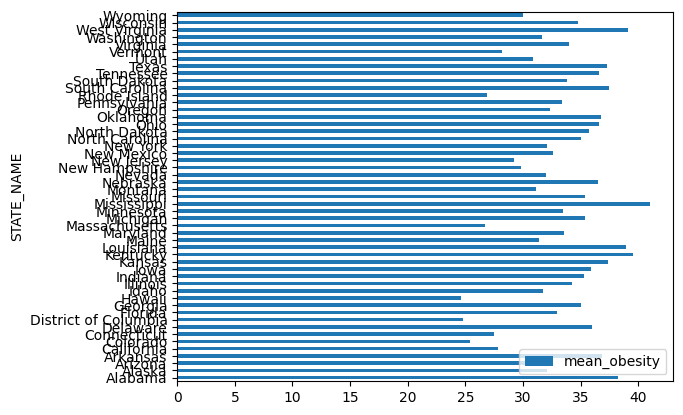

In [2]:
df.groupby(by=['STATE_NAME']).agg(mean_obesity = ('Obesity_prevalence', 'mean')).plot(kind='barh')

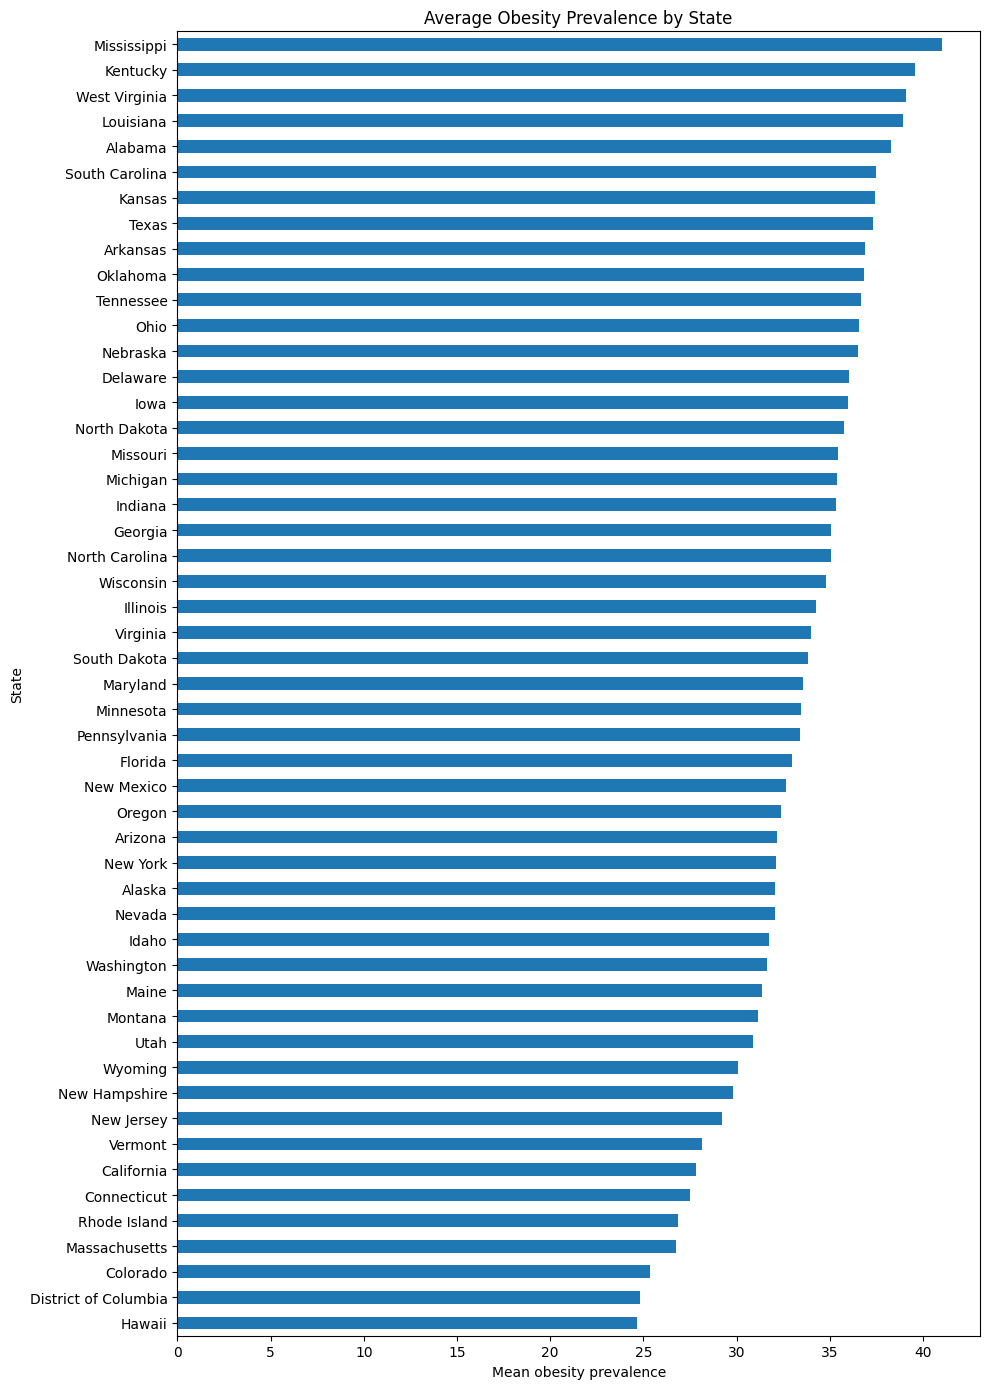

In [3]:
import matplotlib.pyplot as plt

(df.groupby('STATE_NAME')
      .agg(mean_obesity=('Obesity_prevalence', 'mean'))
      .sort_values('mean_obesity')
      .plot(
          kind='barh',
          figsize=(10, 14),
          legend=False
      ))
plt.xlabel('Mean obesity prevalence')
plt.ylabel('State')
plt.title('Average Obesity Prevalence by State')
plt.tight_layout()

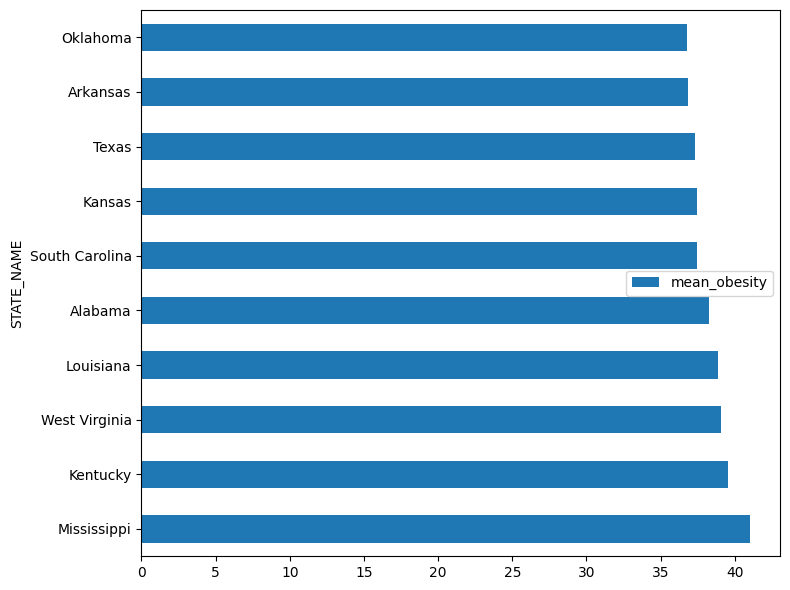

In [5]:
(df.groupby('STATE_NAME')
      .agg(mean_obesity=('Obesity_prevalence', 'mean'))
      .sort_values('mean_obesity', ascending=False)
      .head(10)
      .plot(kind='barh', figsize=(8,6)))
plt.tight_layout()
plt.show()

## Función trampita

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn import linear_model
import numpy as np

In [30]:
def scaler(X_train_, X_test_, nums):
  X_train = X_train_.copy()
  X_test = X_test_.copy()
  scaler = StandardScaler()
  # Train
  X_train_scaled = pd.DataFrame(
             scaler.fit_transform(X_train[nums]),
             columns=scaler.get_feature_names_out(),
             index = X_train.index)
  X_train_scaled = X_train_scaled.join(X_train[list(set(X_train.columns)  - set(nums))])
  # Test
  X_test_scaled = pd.DataFrame(
      scaler.transform(X_test[nums]),
      columns = scaler.get_feature_names_out(),
      index = X_test.index)
  X_test_scaled = X_test_scaled.join(X_test[list(set(X_test.columns)  - set(nums))])
  X_test_scaled = X_test_scaled[X_train_scaled.columns]
  return X_train_scaled, X_test_scaled


def to_binary(X_train_, X_test_, cats):
  X_train =  X_train_.copy()
  X_test = X_test_.copy()
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
  # train
  X_train_bin = pd.DataFrame(ohe.fit_transform(
      X_train[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_train.index)
  X_train_bin = X_train_bin.join(X_train[list(set(X_train.columns)  - set(cats))])
  # test
  X_test_bin = pd.DataFrame(ohe.transform(X_test[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_test.index)
  X_test_bin = X_test_bin.join(X_test[list(set(X_test.columns)  - set(cats))])
  X_test_bin = X_test_bin[X_train_bin.columns]
  return X_train_bin, X_test_bin


# una clase....
def grid_lasso(X_train, y_train):
    model =  linear_model.Lasso(random_state=123)
    alpha = np.linspace(0,10, 1000)
    grid = dict(alpha = alpha)
    cv = KFold(n_splits=5, shuffle=True, random_state=10) # replicables...
    grid_search = GridSearchCV(estimator=model,
                               param_grid=grid,
                               cv=cv,
                               scoring='neg_mean_squared_error',
                               )
    grid_result = grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


## Split

In [17]:
numericals  =["Unemployed_2018", "Median_Household_Income_2018","Bachelor's degree or higher 2014-18",'Total Hospitals (2019)' ]
categoricals = ["STATE_NAME"]
y = 'Obesity_prevalence'
X,y  = df[numericals + categoricals], df[y]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
X_train, X_test = scaler(X_train, X_test, numericals )
X_train, X_test = to_binary(X_train, X_test, categoricals)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [44]:
model = LinearRegression()
model.fit(x_train_ml, y_train)

NameError: name 'LinearRegression' is not defined

In [37]:
y_pred = model.predict(X_test)
y_pred


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


NameError: name 'y_pred' is not defined

In [38]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)


lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -1.70198204 -0.         -0.         -0.        ]
R2 score: 0.3023548967204236
